In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

### Generate random data

In [3]:
def generate_interest_rate_data(start_datetime, duration_seconds):
    # Create a range of timestamps at 1-second intervals for the specified duration
    timestamps = pd.date_range(start=start_datetime, periods=duration_seconds, freq='S')
    # Generate random interest rate levels for each timestamp
    interest_rates = np.random.uniform(0, 10, size=len(timestamps))
    # Create the DataFrame
    df = pd.DataFrame({'Datetime': timestamps, 'Interest Rate': interest_rates})
    return df

In [4]:
start_datetime = pd.Timestamp('2018-10-17 15:56:00+11:00')
duration_seconds = 3600

# Generate the DataFrame
df = generate_interest_rate_data(start_datetime, duration_seconds)

# Display the DataFrame
df.head()

,Datetime,Interest Rate
0,2018-10-17 15:56:00+11:00,2.915676
1,2018-10-17 15:56:01+11:00,7.030271
2,2018-10-17 15:56:02+11:00,2.870807
3,2018-10-17 15:56:03+11:00,8.337097
4,2018-10-17 15:56:04+11:00,9.786991


In [5]:
df.dtypes

Datetime         datetime64[ns, pytz.FixedOffset(660)]
Interest Rate                                  float64
dtype: object

### Compute_realized_volatility function
#### For a 5min realized vol (on 1 datapoint each second)

In [6]:
def compute_realized_volatility(data, window_minutes):
    # Compute the number of periods based on the window size
    window_periods = int(window_minutes * 60)
    # Calculate the difference between interest rates
    data['Rate Difference'] = data['Interest Rate'].diff()  
    # Calculate the squared differences
    data['Squared Difference'] = data['Rate Difference']**2
    # Compute the rolling sum of squared differences for the given window
    data['Rolling Sum'] = data['Squared Difference'].rolling(window_periods).sum()
    # Compute the realized volatility as the square root of the rolling sum
    data['Realized Volatility'] = data['Rolling Sum'].apply(lambda x: x**0.5)
    # Drop intermediate columns
    data = data.drop(['Rate Difference', 'Squared Difference', 'Rolling Sum'], axis=1)
    return data

In [7]:
# Assuming you already have the DataFrame named 'df' with datetime and interest rate columns
window_minutes = 5  # Specify the window size in minutes
# Apply the function to compute realized volatility
df = compute_realized_volatility(df, window_minutes)
# Display the updated DataFrame
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.tail()

,Datetime,Interest Rate,Realized Volatility
3595,2018-10-17 16:55:55+11:00,2.516865,71.896621
3596,2018-10-17 16:55:56+11:00,7.475052,72.066878
3597,2018-10-17 16:55:57+11:00,7.315436,71.918929
3598,2018-10-17 16:55:58+11:00,4.311724,71.980901
3599,2018-10-17 16:55:59+11:00,5.949175,71.851034


### Realized_volatility function
#### For a list of number of minutes realized vol (on 1 datapoint each second)

In [5]:
def realized_volatility(data, window_minutes_list):
    for window_minutes in window_minutes_list:
        # Compute the number of periods based on the window size
        window_periods = int(window_minutes * 60)

        # Calculate the difference between interest rates
        data['Rate Difference'] = data['Interest Rate'].diff()

        # Calculate the squared differences
        data['Squared Difference'] = data['Rate Difference']**2

        # Compute the rolling sum of squared differences for the given window
        data['Rolling Sum'] = data['Squared Difference'].rolling(window_periods).sum()

        # Compute the realized volatility as the square root of the rolling sum
        col_name = f'Realized Volatility {window_minutes}min'
        data[col_name] = data['Rolling Sum'].apply(lambda x: x**0.5)

        # Drop intermediate columns
        data = data.drop(['Rate Difference', 'Squared Difference', 'Rolling Sum'], axis=1)

    return data

In [ ]:
df.head()

In [44]:
# Assuming you already have the DataFrame named 'df' with datetime and interest rate columns
window_minutes_list = [1, 5, 15, 30, 60]  # Specify the window sizes in minutes

# Apply the function to compute realized volatility for each window size
df = realized_volatility(df, window_minutes_list)

# Display the updated DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.tail(50)

,Datetime,Interest Rate,Realized Volatility 1min,Realized Volatility 5min,Realized Volatility 15min,Realized Volatility 30min,Realized Volatility 60min
7150,2018-10-17 17:55:10+11:00,4.731094,30.757988,74.070094,123.849799,172.062874,242.903279
7151,2018-10-17 17:55:11+11:00,6.148694,30.790011,73.865219,123.843101,172.067643,242.850777
7152,2018-10-17 17:55:12+11:00,3.815629,30.420031,73.849063,123.753282,172.047074,242.808897
7153,2018-10-17 17:55:13+11:00,1.222432,30.524052,73.849097,123.536233,172.016434,242.750875
7154,2018-10-17 17:55:14+11:00,5.438954,30.153502,73.754646,123.593406,172.056087,242.697751
7155,2018-10-17 17:55:15+11:00,7.753192,30.084010,73.556985,123.604528,172.069277,242.708784
7156,2018-10-17 17:55:16+11:00,5.715949,29.541043,73.518503,123.589256,172.066883,242.699183
7157,2018-10-17 17:55:17+11:00,4.384723,29.568809,73.248641,123.406894,171.901936,242.700078
7158,2018-10-17 17:55:18+11:00,6.286671,29.491848,73.265089,123.348556,171.910606,242.650908
7159,2018-10-17 17:55:19+11:00,9.415025,28.994129,73.197488,123.372427,171.939033,242.544940


## Annualized Realized volatilities

#### Genereating the Data

In [42]:
start_datetime = pd.Timestamp('2018-10-17 15:56:00+11:00')
duration_seconds = 7200

# Generate the DataFrame
df = generate_interest_rate_data(start_datetime, duration_seconds)
df.head()

,Datetime,Interest Rate
0,2018-10-17 15:56:00+11:00,0.842274
1,2018-10-17 15:56:01+11:00,7.692632
2,2018-10-17 15:56:02+11:00,2.566832
3,2018-10-17 15:56:03+11:00,1.627602
4,2018-10-17 15:56:04+11:00,9.591370


#### Defining the function

In [9]:
def compute_realized_volatility(data, window_minutes_list):
    for window_minutes in window_minutes_list:
        # Compute the number of periods based on the window size
        window_periods = int(window_minutes * 60)

        # Calculate the difference between interest rates
        data['Rate Difference'] = data['Interest Rate'].diff()

        # Calculate the squared differences
        data['Squared Difference'] = data['Rate Difference']**2

        # Compute the rolling sum of squared differences for the given window
        data['Rolling Sum'] = data['Squared Difference'].rolling(window_periods).sum()

        # Compute the realized volatility as the square root of the rolling sum
        col_name = f'Realized Volatility {window_minutes}min'
        data[col_name] = data['Rolling Sum'].apply(lambda x: x**0.5)

        # Drop intermediate columns
        data = data.drop(['Rate Difference', 'Squared Difference', 'Rolling Sum'], axis=1)

    return data

In [10]:
# Assuming you already have the DataFrame named 'df' with datetime and interest rate columns
window_minutes_list = [1, 5, 15, 30, 60]  # Specify the window sizes in minutes

# Apply the function to compute annualized realized volatility for each window size
df = compute_realized_volatility(df, window_minutes_list)

# Display the updated DataFrame
df.tail()

,Datetime,Interest Rate,Realized Volatility,Realized Volatility 1min,Realized Volatility 5min,Realized Volatility 15min,Realized Volatility 30min,Realized Volatility 60min
3595,2018-10-17 16:55:55+11:00,2.516865,71.896621,33.756722,71.896621,120.792567,169.050921,NaN
3596,2018-10-17 16:55:56+11:00,7.475052,72.066878,33.795822,72.066878,120.802490,169.123504,NaN
3597,2018-10-17 16:55:57+11:00,7.315436,71.918929,33.121943,71.918929,120.800996,169.115676,NaN
3598,2018-10-17 16:55:58+11:00,4.311724,71.980901,33.190147,71.980901,120.837871,169.112478,NaN
3599,2018-10-17 16:55:59+11:00,5.949175,71.851034,32.931911,71.851034,120.808729,168.955418,NaN


In [12]:
import datetime as dt
df['Datetime'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m%d %H:%M:%S"))

Series([], Name: Datetime, dtype: datetime64[ns, pytz.FixedOffset(660)])

In [13]:
df.dtypes

Datetime                     datetime64[ns, pytz.FixedOffset(660)]
Interest Rate                                              float64
Realized Volatility                                        float64
Realized Volatility 1min                                   float64
Realized Volatility 5min                                   float64
Realized Volatility 15min                                  float64
Realized Volatility 30min                                  float64
Realized Volatility 60min                                  float64
dtype: object

ValueError: Could not interpret value `dateTime` for parameter `x`

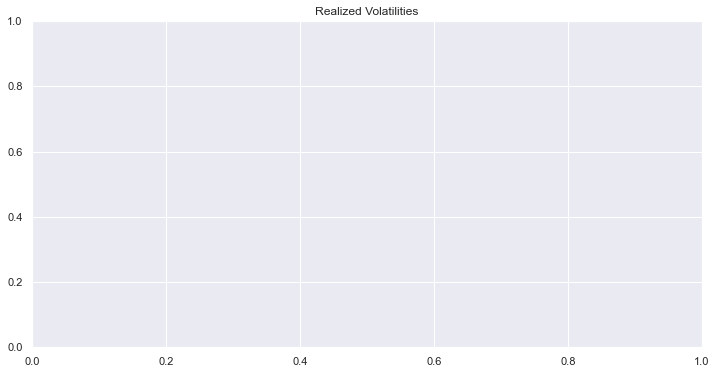

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with NaN values
df.dropna(inplace=True)

# Filter column names ending with "RV"
rv_columns = list(filter(lambda col: col.startswith('Realized Volatility '), df.columns))

# Plot each RV value against time
sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
plt.title("Realized Volatilities")

for rv_column in rv_columns:
    sns.lineplot(data=df, x='dateTime', y=rv_column, label=rv_column)

plt.xlabel('Date and Time')
plt.ylabel('Realized Volatility')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()